## Module 2 : Finding Neutral Atom Qubit Gates
### Exercise 2-3 : CZ-gate realization with two Atom Qubits
Problem Unsolved : 
- why CZ gate is diag[1,-1,-1,-1] ?

In [1]:
%reset
%reload_ext autoreload
%autoreload 2

from common_imports import *
# Import ALL configuration variables from config file
from Default_TQCONFIG_for_CZ_GATE import *

#### About the two atom model
<div style="text-align: center;">
  <img src="./images/two_atom_ham.png" width="50%" >
</div>

#### There is an error needed to be mentioned

<img src="./images/error_image.png" width="75%">

## Exercise : Given the initial parameters, Do the Simulation

#### Initial state & Monitered Operators

In [ ]:
# initial state
psi0 = two_atom_fock_states[1][0]  # |1,0>

# list of wanted operators
pop_stated = tensor(stated * stated.dag(), Qobj(np.eye(4)))  # |d><d| ⊗ I

expect_op_list = [
  psi0 * psi0.dag(),
  two_atom_fock_states[2][0] * two_atom_fock_states[2][0].dag(),
  pop_stated,
]

#### Run the simulation

In [3]:
# construct the total Hamiltonian
Htotal, collapse_list = construct_TD_TAHam(atom0_ham_params, atom1_ham_params, 
                                           lindblad_params, lindblad_params, Rydberg_B)

# simulate the dynamics
result = mesolve(Htotal, psi0, tlist, collapse_list, expect_op_list, 
                 options={"store_final_state": 1, "store_states": 0})

d:\anaconda3\envs\my_qiskit\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


<Axes: xlabel='Time ($\\mu$s)', ylabel='$\\log_{10}$(Population)'>

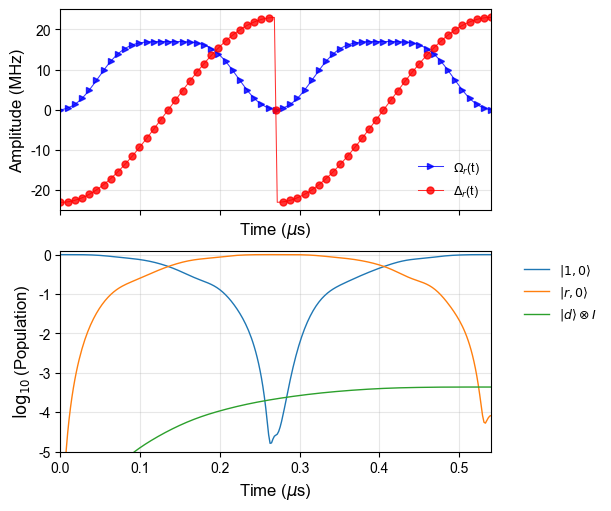

In [ ]:
plotting_styles["Omega_r_pulse"]["markevery"] = 5
plotting_styles["Delta_r_pulse"]["markevery"] = 5
plt.rcParams.update(plt_config)

fig, axes = plt.subplots(2, 1, figsize=(6, 5), sharex=True, sharey=False, constrained_layout=True)
axes = axes.ravel()

# ============================================================================
# Plot the pulse shapes
# ============================================================================
pulse_dict = {
  'Omega_r': {'data': APR_pulse_Omega_r, 'args': Omega_r_pulse_args, 
              'label': r'$\Omega_r$(t)', 'style': 'Omega_r_pulse'},
  'Delta_r': {'data': APR_pulse_Delta_r, 'args': Delta_r_pulse_args, 
              'label': r'$\Delta_r$(t)', 'style': 'Delta_r_pulse'}
}

plot_pulse_shapes(
  ax = axes[0],
  tlist = tlist,
  pulse_dict = pulse_dict,
  title = None,
  xlabel = r"Time ($\mu$s)",
  ylabel = "Amplitude (MHz)",
  normalize_2pi = True,
  ylim = (-25, 25),
  grid_alpha = 0.3,
  legend_config = legend_styles['compact'],
)

# ============================================================================
# Plot the population evolution
# ============================================================================
pop_list = [result.expect[0], result.expect[1], result.expect[2]]
legend_list = [r"$|1,0\rangle$", r"$|r,0\rangle$", r"$|d\rangle\otimes I$"]
axes[1] = plot_population_evolution(
  ax = axes[1],
  tlist = tlist,
  pop_list = pop_list,
  legend_list = legend_list,
  log_scale = True,
  ylim = (-5, 0.1),
  plotting_style_list = [plotting_styles["pop_style_a"], 
                         plotting_styles["pop_style_a"], 
                         plotting_styles["pop_style_a"]],
)

#### Initial state & Monitered Operators

In [8]:
# initial state
psi0 = two_atom_fock_states[1][1]  # |1,1>

# list of wanted operators
state_1rr1 = 1 / np.sqrt(2) * (two_atom_fock_states[1][2] + two_atom_fock_states[2][1]) # |1,r> + |r,1> normalized
pop_stated = tensor(stated * stated.dag(), Qobj(np.eye(4)))  # |d><d| ⊗ I

expect_op_list = [
  psi0 * psi0.dag(),
  state_1rr1 * state_1rr1.dag(),
  two_atom_fock_states[2][2] * two_atom_fock_states[2][2].dag(),
  pop_stated,
]

#### Run the simulation

In [9]:
# construct the total Hamiltonian
Htotal, collapse_list = construct_TD_TAHam(atom0_ham_params, atom1_ham_params, 
                                           lindblad_params, lindblad_params, Rydberg_B)

# simulate the dynamics
result = mesolve(Htotal, psi0, tlist, collapse_list, expect_op_list, 
                 options={"store_final_state": 1, "store_states": 0})

d:\anaconda3\envs\my_qiskit\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


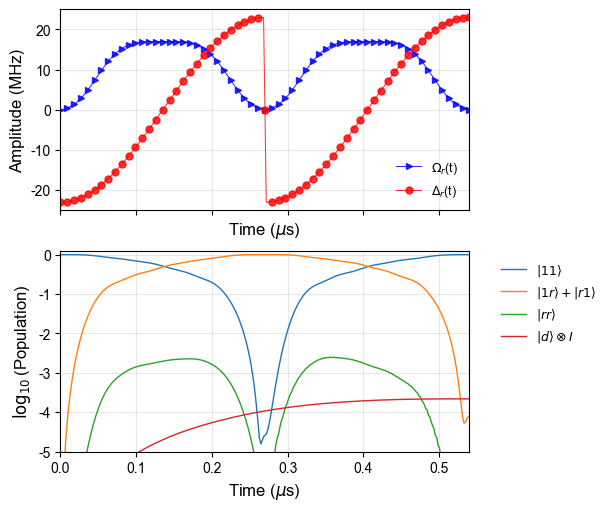

In [11]:
plt.rcParams.update(plt_config)
fig, axes = plt.subplots(2, 1, figsize=(6, 5), sharex=True, sharey=False, constrained_layout=True)
axes = axes.ravel()


# ============================================================================
# Plot the pulse shapes
# ============================================================================
pulse_dict = {
  'Omega_r': {'data': APR_pulse_Omega_r, 'args': Omega_r_pulse_args, 
              'label': r'$\Omega_r$(t)', 'style': 'Omega_r_pulse'},
  'Delta_r': {'data': APR_pulse_Delta_r, 'args': Delta_r_pulse_args, 
              'label': r'$\Delta_r$(t)', 'style': 'Delta_r_pulse'}
}

axes[0] = plot_pulse_shapes(
  ax = axes[0],
  tlist = tlist,
  pulse_dict = pulse_dict,
  title = None,
  xlabel = r"Time ($\mu$s)",
  ylabel = "Amplitude (MHz)",
  normalize_2pi = True,
  ylim = (-25, 25),
  grid_alpha = 0.3,
  legend_config = legend_styles['compact'],
)

# ============================================================================
# Plot the population evolution
# ============================================================================
pop_list = [result.expect[0], result.expect[1], result.expect[2], result.expect[3]]
legend_list = [r"$|11\rangle$", r"$|1r\rangle + |r1\rangle$", 
               r"$|rr\rangle$", r"$|d\rangle\otimes I$"]
axes[1] = plot_population_evolution(
  ax = axes[1],
  tlist = tlist,
  pop_list = pop_list,
  legend_list = legend_list,
  log_scale = True,
  ylim = (-5, 0.1),
  plotting_style_list = [plotting_styles["pop_style_a"]],
)

## Exercise : Take different values of $\gamma_r$, Do the simulations & calculate fidelities

#### Initialize

In [1]:
%reset
%reload_ext autoreload
%autoreload 2

from common_imports import *
# Import ALL configuration variables from config file
from Default_TQCONFIG_for_CZ_GATE import *

In [ ]:
# decay rate list for scans
gamma_r_list = [1/5, 1/50, 1/100, 1/250, 1/540, 1/1000]

# initial state list for gate fidelity computation
psi0_list = make_initial_list_for_gate_fidelity(num_qubits = 2, dim_atom = 4)
qs0_list = make_initial_list_for_gate_fidelity(num_qubits = 2, dim_atom = 2)

In [8]:
# store fidelity results
fidelity_arith_list = []
fidelity_geom_list = []
fidelity_mixed_list = []

for pidx, gamma_r in enumerate(gamma_r_list):
  # update the Lindblad parameters
  lindblad_params['gamma_r'] = gamma_r  # [1/us]

  # construct Hamiltonian
  Htotal, collapse_list = construct_TD_TAHam(atom0_ham_params, atom1_ham_params, 
                                             lindblad_params, lindblad_params, Rydberg_B)
  
  # compute the state fidelities
  state_fidelity_list, _ = compute_state_fidelity(
    qs0_list,
    target_gate, 
    Htotal, 
    collapse_list, 
    tlist,
    psi0_list=psi0_list,
    comp_indices=comp_indices,
    expect_list=None
  )

  # compute different types of gate fidelities
  fidelity_mixed, fidelity_geom, fidelity_arith = compute_gate_fidelity_mixed(
    state_fidelity_list, dim_qubits, True
  )
  fidelity_mixed_list.append(fidelity_mixed)
  fidelity_geom_list.append(fidelity_geom)
  fidelity_arith_list.append(fidelity_arith)

d:\anaconda3\envs\my_qiskit\Lib\site-packages\qutip\core\data\expm.py:139: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  return Dense(scipy.linalg.sqrtm(matrix.as_ndarray()))


<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
C:\Windows\Temp\ipykernel_2724\1193913223.py:16: SyntaxWarning: invalid escape sequence '\g'
  title = "CZ Gate Infidelity vs Lifetime of Rydberg State $\gamma_r$ ( B/2$\pi$ = 200 MHz )",


<Axes: title={'center': 'CZ Gate Infidelity vs Lifetime of Rydberg State $\\gamma_r$ ( B/2$\\pi$ = 200 MHz )'}, xlabel='$\\log_{10}(\\gamma_r*540)$ (MHz)', ylabel='1-F'>

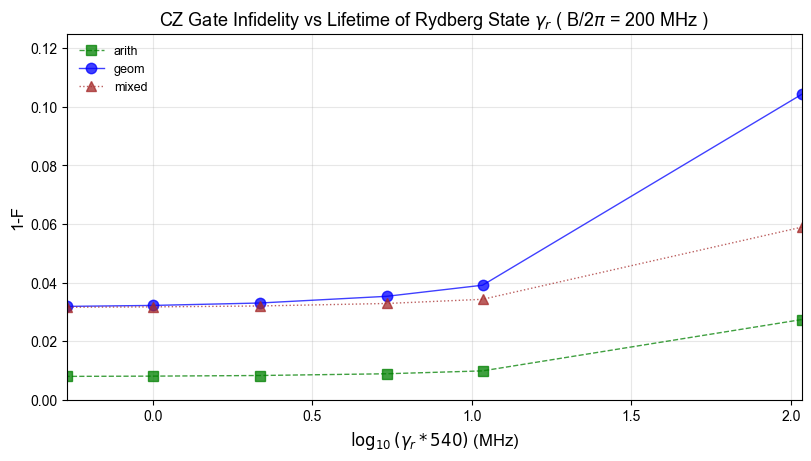

In [10]:
legend_list = ['arith', 'geom', 'mixed']

# plot
plt.rcParams.update(plt_config)

fig, ax = plt.subplots(figsize=(8, 4.5), sharex=True, sharey=True, constrained_layout=True)

plot_fidelity_vs_parameter(
    ax = ax,
    param_list = np.log10(np.array(gamma_r_list) * 540),
    # fidelity_list = [fidelity_arith_results],
    # fidelity_list = [fidelity_geom_results],
    # fidelity_list = [fidelity_mixed_results],
    fidelity_list = [fidelity_arith_list, fidelity_geom_list, fidelity_mixed_list],
    legend_list = legend_list,
    title = "CZ Gate Infidelity vs Lifetime of Rydberg State $\gamma_r$ ( B/2$\pi$ = 200 MHz )",
    xlabel = r"$\log_{10}(\gamma_r*540)$ (MHz)",
    ylabel = "1-F",
    use_infidelity = True,
    log_scale = False,
    xlim = None,
    ylim = (0, 0.125),
    grid_alpha = 0.3,
    show_legend = True,
    plotting_style_list = [plotting_styles['fidelity_style_a'], 
                           plotting_styles['fidelity_style_b'], 
                           plotting_styles['fidelity_style_c']]
)

### Conclusion
- the fidelity increases as the $\gamma_r$ decreases ( or the lifetime increases ), but when $\gamma_r$ is below $\frac{1}{540}$ (MHz), the fidelity does not change too much

## Exercise : Take different values of $(T_g, \tau, \Omega_r, \Delta_r)$, calculate fidelities as function of $B/2\pi$

#### Initialize

In [12]:
%reset
%reload_ext autoreload
%autoreload 2

from common_imports import *
# Import ALL configuration variables from config file
from Default_TQCONFIG_for_CZ_GATE import *

In [13]:
# pulse parameter lists for scans
T_gate_list = [1.08, 0.54, 0.27] # [us] 
tau_list = [0.175 * T_gate for T_gate in T_gate_list]  # [us]
amp_Omega_r_list = [8.5*2*np.pi, 17*2*np.pi, 34*2*np.pi]  # [MHz]
amp_Delta_r_list = [11.5*2*np.pi, 23*2*np.pi, 46*2*np.pi]  # [MHz]

# Rydberg interaction strength list for scans
scale_B_list = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
                1250, 1500, 1750, 2000, 2500, 3000]  # [MHz]
# scale_B_list = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # [MHz]
Rydberg_B_list = [scale_B * 2 * np.pi for scale_B in scale_B_list]

In [15]:
# initial state list for gate fidelity computation
psi0_list = make_initial_list_for_gate_fidelity(num_qubits = 2, dim_atom = 4)
qs0_list = make_initial_list_for_gate_fidelity(num_qubits = 2, dim_atom = 2)

In [16]:
# store fidelity results
fidelity_arith_results = []
fidelity_geom_results = []
fidelity_mixed_results = []

# for each set of pulse parameters
for pidx, (T_gate, tau, amp_Omega_r, amp_Delta_r) in enumerate(zip(T_gate_list, tau_list, amp_Omega_r_list, amp_Delta_r_list)):
  # update pulse args
  Omega_r_pulse_args["amp_Omega_r"] = amp_Omega_r
  Omega_r_pulse_args["T_gate"] = T_gate
  Omega_r_pulse_args["tau"] = tau
  Delta_r_pulse_args["amp_Delta_r"] = amp_Delta_r
  Delta_r_pulse_args["T_gate"] = T_gate
  Delta_r_pulse_args["tau"] = tau
  
  # time list
  tlist = np.linspace(0, T_gate, 300 + 1)  # [us]

  # store fidelity for this pulse
  fidelity_arith_for_this_pulse = []
  fidelity_geom_for_this_pulse = []
  fidelity_mixed_for_this_pulse = []

  # for each Rydberg blockade strength
  for rIdx, Rydberg_B in enumerate(Rydberg_B_list):
    # construct the total Hamiltonian
    Htotal, collapse_list = construct_TD_TAHam(
      atom0_ham_params, atom1_ham_params, 
      lindblad_params, lindblad_params, Rydberg_B)
    
    # compute the state fidelities
    state_fidelity_list, _ = compute_state_fidelity(
      qs0_list,
      target_gate, 
      Htotal, 
      collapse_list, 
      tlist,
      psi0_list=psi0_list,
      comp_indices=comp_indices,
      expect_list=None
    )

    # compute different types of gate fidelities
    fidelity_mixed, fidelity_geom, fidelity_arith = compute_gate_fidelity_mixed(
      state_fidelity_list, dim_qubits, True)
    fidelity_mixed_for_this_pulse.append(fidelity_mixed)
    fidelity_geom_for_this_pulse.append(fidelity_geom)
    fidelity_arith_for_this_pulse.append(fidelity_arith)
  
  # store the results for this pulse
  fidelity_arith_results.append(fidelity_arith_for_this_pulse)
  fidelity_geom_results.append(fidelity_geom_for_this_pulse)
  fidelity_mixed_results.append(fidelity_mixed_for_this_pulse)

d:\anaconda3\envs\my_qiskit\Lib\site-packages\qutip\core\data\expm.py:139: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  return Dense(scipy.linalg.sqrtm(matrix.as_ndarray()))


<Axes: title={'center': 'CZ Gate Infidelity vs Rydberg Blockade Strength'}, xlabel='$B/2\\pi$ (MHz)', ylabel='Infidelity'>

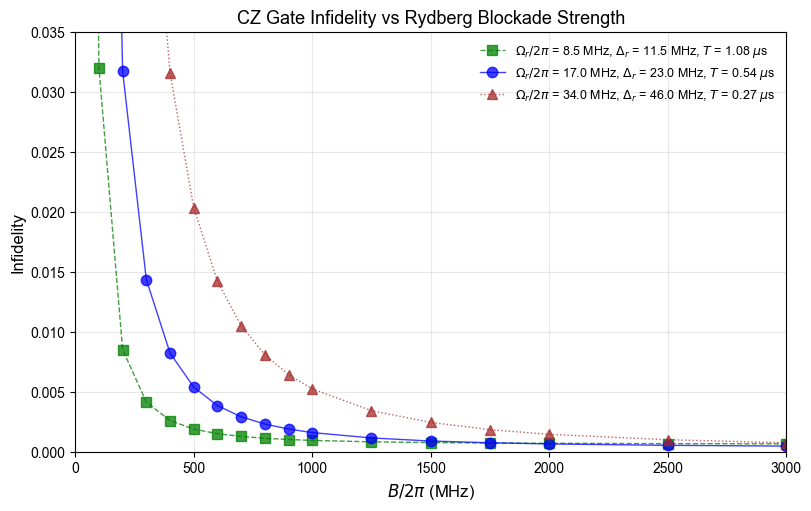

In [21]:
legend_list = [r'$\Omega_r/2\pi$ = {:.1f} MHz, $\Delta_r$ = {:.1f} MHz, $T$ = {:.2f} $\mu$s'.
               format(amp_Omega_r/(2*np.pi), amp_Delta_r/(2*np.pi), T_gate) 
               for amp_Omega_r, amp_Delta_r, T_gate 
               in zip(amp_Omega_r_list, amp_Delta_r_list, T_gate_list)]

# plot
plt.rcParams.update(plt_config)

fig, ax = plt.subplots(figsize=(8, 5), sharex=True, sharey=True, constrained_layout=True)

plot_fidelity_vs_parameter(
    ax = ax,
    param_list = scale_B_list,
    # fidelity_list = fidelity_arith_results,
    # fidelity_list = fidelity_geom_results,
    fidelity_list = fidelity_mixed_results,
    legend_list = legend_list,
    title = "CZ Gate Infidelity vs Rydberg Blockade Strength",
    xlabel = r"$B/2\pi$ (MHz)",
    ylabel = "Infidelity",
    use_infidelity = True,
    log_scale = False,
    xlim = None,
    ylim = (0, 0.035),
    grid_alpha = 0.3,
    show_legend = True,
    plotting_style_list = [plotting_styles['fidelity_style_a'], 
                           plotting_styles['fidelity_style_b'], 
                           plotting_styles['fidelity_style_c']]
)

### Conclusions
- As the Rydberg Blockadge Strength increases, the fidelity also increases, but it seems approach to a constant but not zero
- Different types of Gate fidelity give similiar trend, and also similar to the figure in the paper.